# PREDICTING HOUSE RATES


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading Data
train=pd.read_csv(r"C:\Users\Admin\Project ML\train.csv")
test=pd.read_csv(r"C:\Users\Admin\Project ML\test.csv")

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [193]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [194]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [195]:
print('Train data set has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print('Test data set has {0}rows and {1} columns'.format(test.shape[0],test.shape[1]))

Train data set has 1460 rows and 81 columns
Test data set has 1459rows and 80 columns


In [196]:
#finding missing value
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

AttributeError: module 'seaborn' has no attribute 'plt'

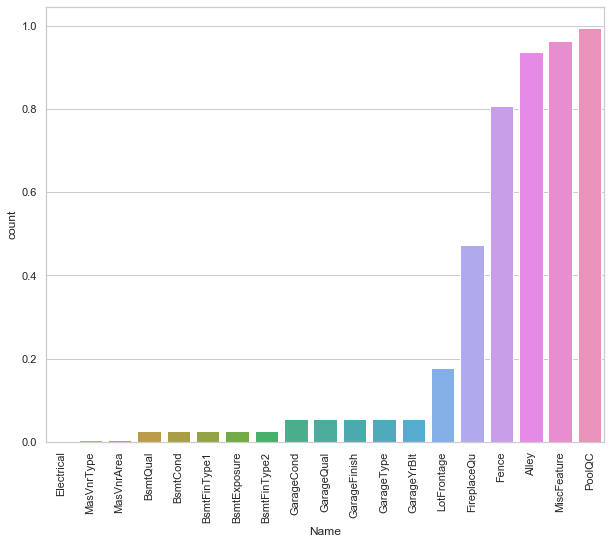

In [197]:
# missing values percentage
missing=train.isnull().sum()/len(train)
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing=missing.to_frame()
missing.columns=['count']
missing.index.names=['Name']
missing['Name']=missing.index
#plot
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing)
plt.xticks(rotation = 90)
sns.plt.show()

DATA EXPLORATION

In [198]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

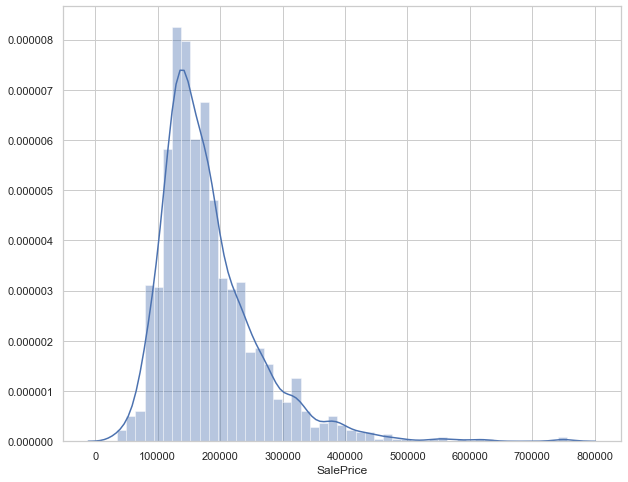

In [199]:
sns.distplot(train['SalePrice']);

In [200]:
(mu,sigma)=norm.fit(train['SalePrice'])
print('mu={:.2f},sigma={:.2f}\n'.format(mu,sigma))

mu=180921.20,sigma=79415.29



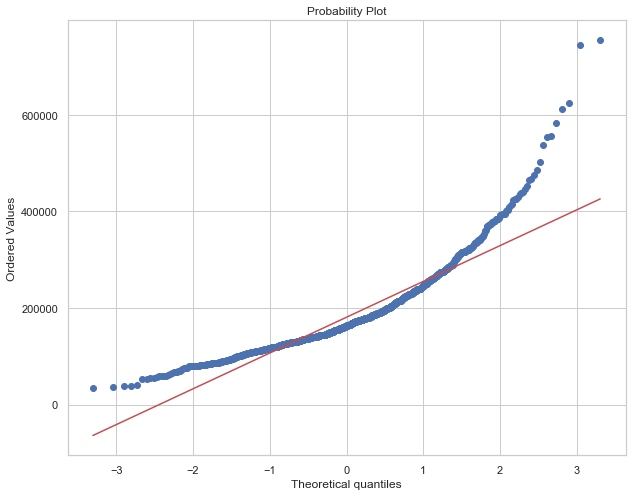

Skewness: 1.882876
Kurtosis: 6.536282


In [201]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

MULTIVARIABLE ANALYSIS:
i)check numerical-data is simple and clean
ii)check categorical

In [202]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [203]:
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [204]:
cate=len(train.select_dtypes(include=['object']).columns)
nume=len(train.select_dtypes(include=['int64','float64']).columns)
print('Categorical:',cate,'Numerical:',nume,'Total features:',cate+nume)

Categorical: 43 Numerical: 38 Total features: 81


TOTAL FEATURES 81
PLOT:USING CORRELATION MATRIX

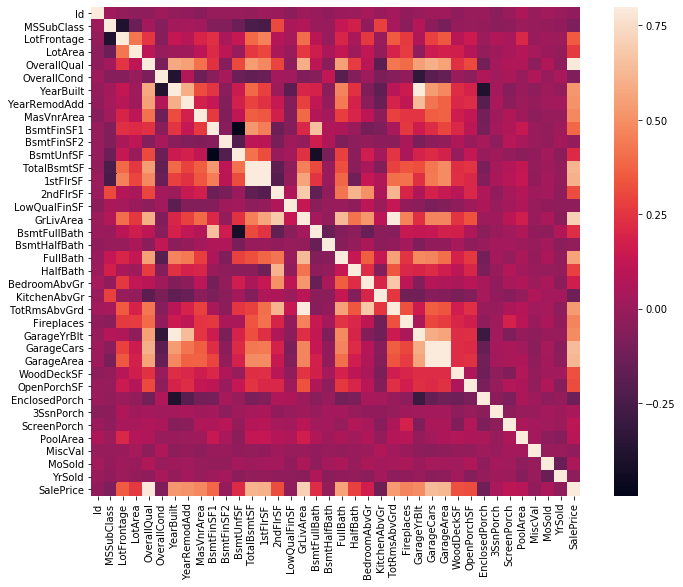

In [3]:
comat=train.corr()
f,a=plt.subplots(figsize=(12,9))
sns.heatmap(comat,vmax=.8,square=True)

In [206]:
hm=(comat['SalePrice'].sort_values(ascending=False)[:10])
print(hm)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


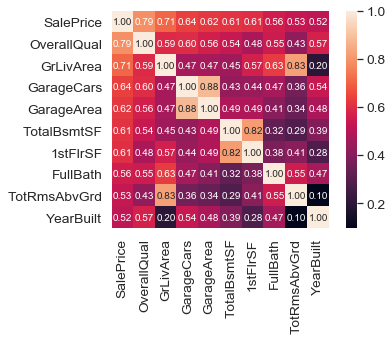

In [4]:
k = 10#number of variables for heatmap
col = comat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,cbar=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [208]:
related=pd.DataFrame(col)
related.columns=['Most Related Columns']
related

,Most Related Columns
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


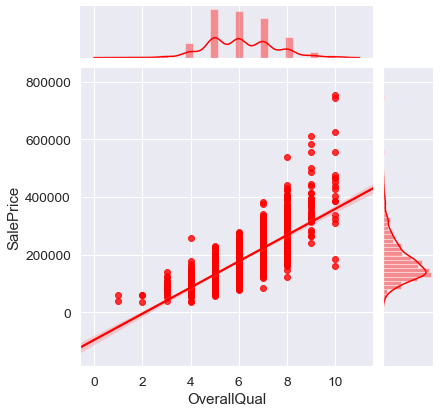

In [209]:
#OVERALL QUALITY VS SALES PRICE
sns.jointplot(x=train['OverallQual'],y=train['SalePrice'],kind='reg',color='red')

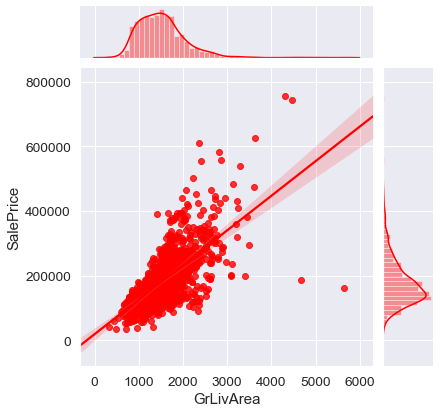

In [210]:
#SALES PRICE VS GRLIVAREA(Living area)
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg',color='red')

In [211]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index).reset_index(drop=True)

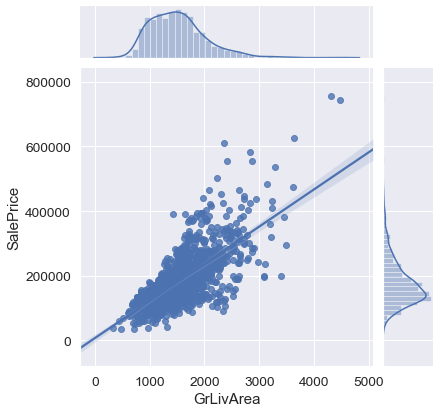

In [212]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

In [213]:
#VALUES CLEANED

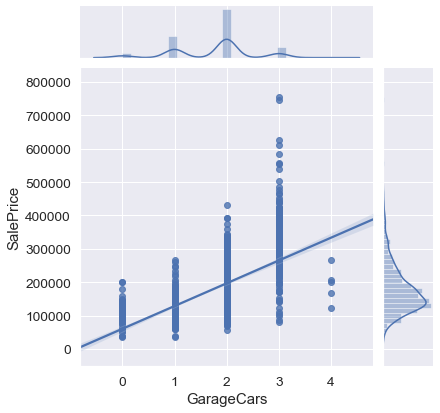

In [214]:
#GARAGE CARS VS SALES PRICE
sns.jointplot(x=train['GarageCars'],y=train['SalePrice'],kind='reg')

In [215]:
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)


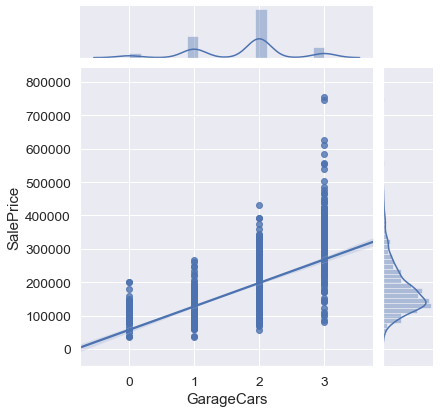

In [216]:
sns.jointplot(x=train['GarageCars'],y=train['SalePrice'],kind='reg')

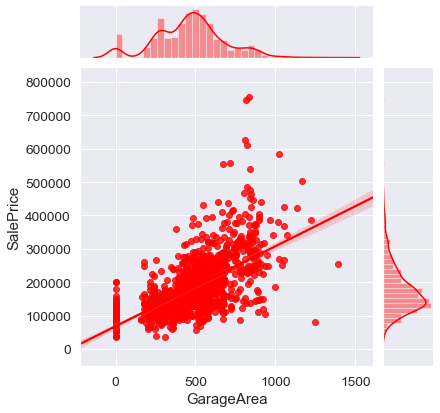

In [217]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg',color='red')

In [218]:
train = train.drop(train[(train['GarageArea']>1000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

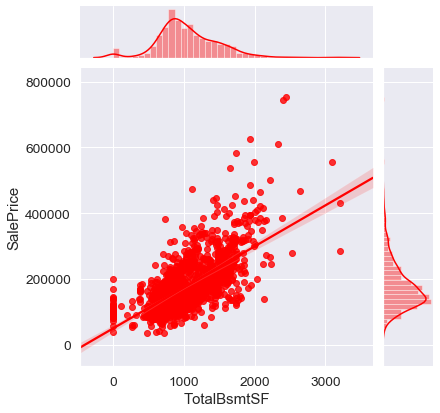

In [219]:
#COMPARE
#Basement Area vs Sale Price
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg',color='red')

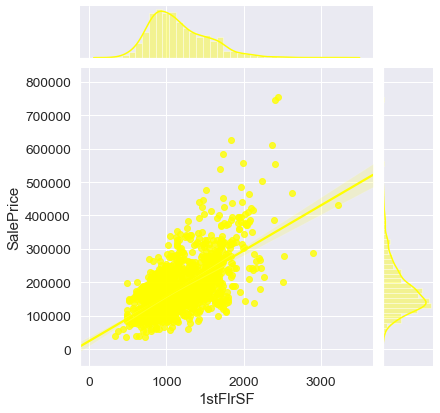

In [220]:
# First Floor Area vs Sale Price
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg',color='yellow')

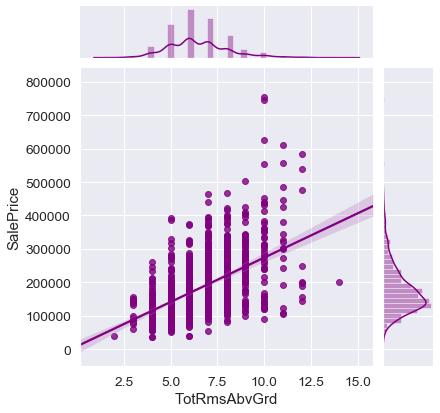

In [221]:
# Total Rooms vs Sale Price
sns.jointplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'],kind='reg',color='purple')

AttributeError: 'Figure' object has no attribute 'axis'

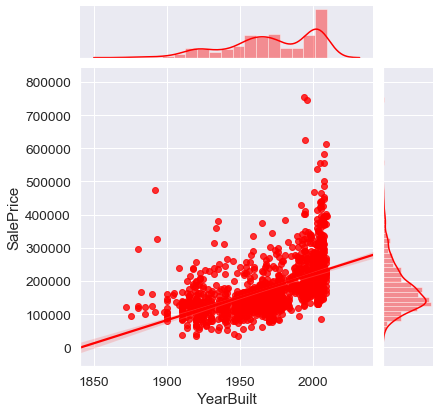

In [222]:
data=pd.concat([train['SalePrice'],train['YearBuilt']])
fix=sns.jointplot(x=train['YearBuilt'],y=train['SalePrice'],data=data,kind='reg',color='red')
fig.axis(ymin=0,ymax=800000);

In [223]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1448, 81)
Test data size is : (1459, 80)
Combined dataset size is : (2907, 80)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [224]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.690402
MiscFeature,96.422429
Alley,93.223254
Fence,80.392157
FireplaceQu,48.710010
LotFrontage,16.683867
GarageQual,5.469556
GarageCond,5.469556
GarageFinish,5.469556
GarageYrBlt,5.469556


Text(0.5, 1.0, 'Percent missing data by feature')

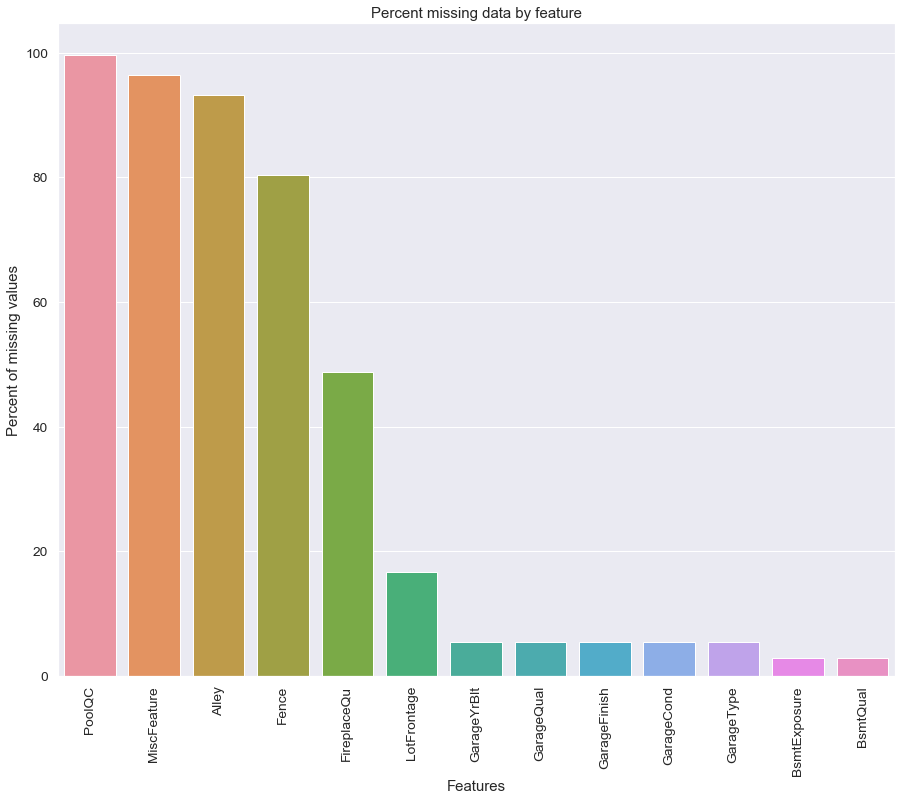

In [275]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [57]:
all_data["LotFrontage"]=all_data["LotFrontage"].fillna("None")
all_data["GarageQual"]=all_data["GarageQual"].fillna("None")
all_data["GarageCond"]=all_data["GarageCond"].fillna("None")
all_data["GarageFinish"]=all_data["GarageFinish"].fillna("None")
all_data["GarageYrBlt"]=all_data["GarageYrBlt"].fillna("None")
all_data["GarageType"]=all_data["GarageType"].fillna("None")
all_data["BsmtExposure"]=all_data["BsmtExposure"].fillna("None")
all_data["BsmtQual"]=all_data["BsmtQual"].fillna("None")

In [226]:
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].fillna("None")
all_data["MasVnrType"]=all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna("None")

In [227]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio
PoolQC,99.690402
MiscFeature,96.422429
Alley,93.223254
Fence,80.392157
FireplaceQu,48.710010


In [228]:
all_data["BsmtCond"]=all_data["BsmtCond"].fillna("None")
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].fillna("None")
all_data["MSZoning"]=all_data["MSZoning"].fillna("None")
all_data["Functional"]=all_data["Functional"].fillna("None")
all_data["BsmtFullBath"]=all_data["BsmtFullBath"].fillna("None")
all_data["Utilities"]=all_data["Utilities"].fillna("None")
all_data["BsmtHalfBath"]=all_data["BsmtHalfBath"].fillna("None")
all_data["TotalBsmtSF"]=all_data["TotalBsmtSF"].fillna("None")
all_data["SaleType"]=all_data["SaleType"].fillna("None")
all_data["KitchenQual"]=all_data["KitchenQual"].fillna("None")
all_data["GarageCars"]=all_data["GarageCars"].fillna("None")
all_data["GarageArea"]=all_data["GarageArea"].fillna("None")
all_data["Exterior2nd"]=all_data["Exterior2nd"].fillna("None")
all_data["Exterior1st"]=all_data["Exterior1st"].fillna("None")
all_data["Electrical"]=all_data["Electrical"].fillna("None")
all_data["BsmtUnfSF"]=all_data["BsmtUnfSF"].fillna("None")
all_data["BsmtFinSF2"]=all_data["BsmtFinSF2"].fillna("None")
all_data["BsmtFinSF1"]=all_data["BsmtFinSF1"].fillna("None")

In [229]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.690402
MiscFeature,96.422429
Alley,93.223254
Fence,80.392157
FireplaceQu,48.710010


In [230]:
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"]=all_data["Fence"].fillna("None")
all_data["FireplaceQc"]=all_data["FireplaceQu"].fillna("None")

In [231]:
all_data['MSSubClass'].describe()

count    2907.000000
mean       57.094943
std        42.510238
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [232]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [233]:
all_data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', 'None'], dtype=object)

In [234]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
# Check shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2907, 81)


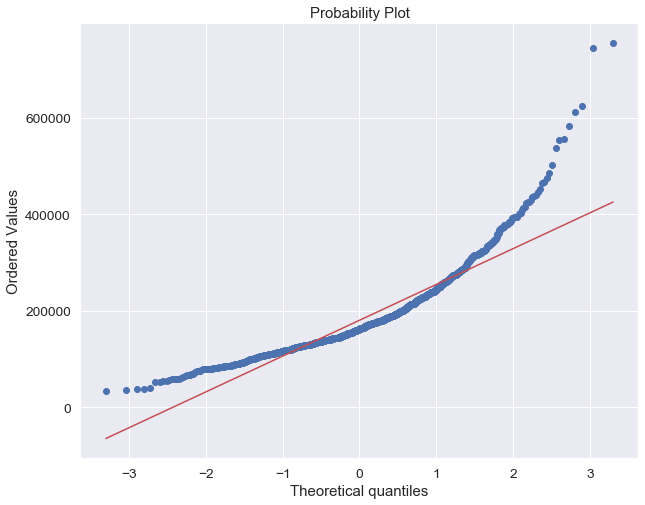

Skewness: 1.894512
Kurtosis: 6.568230


In [235]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
y_train = train.SalePrice.values
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [236]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2907, 4734)


In [237]:
test.set_index('Id',inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 

In [238]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [239]:
data = pd.get_dummies(data, columns=categorical_cols)

In [240]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda cols: labelencoder.fit_transform(cols.astype(str)))

In [241]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [242]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [243]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [244]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [245]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1462,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
1463,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
1464,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
1465,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4


In [246]:
train.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     258
GarageYrBlt      81
MasVnrArea        8
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
dtype: int64

In [247]:
test.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF2        1
GarageCars        1
GarageArea        1
BsmtUnfSF         1
BsmtFinSF1        1
TotalBsmtSF       1
BsmtQual          0
Foundation        0
ExterCond         0
RoofStyle         0
BsmtCond          0
ExterQual         0
BsmtExposure      0
MasVnrType        0
BsmtFinType1      0
dtype: int64

In [248]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [249]:
train = train[col]
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [250]:
test=test[col.drop('SalePrice')]

In [251]:
test.isnull().sum().sort_values(ascending=False).head(20)

TotalBsmtSF     1
GarageArea      1
GarageCars      1
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
GrLivArea       0
OverallQual     0
dtype: int64

In [252]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
Id,,,,,,,,,
1461,5,896,1.0,730.0,882.0,896,1,5,1961
1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958
1463,5,1629,2.0,482.0,928.0,928,2,6,1997
1464,6,1604,2.0,470.0,926.0,926,2,7,1998
1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992


In [253]:


test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)


In [255]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [256]:
X_train

array([[ 0.66551759,  0.23846968,  0.33026158, ...,  0.79597961,
        -0.30687073,  1.04369882],
       [-0.07451459, -0.5068223 ,  0.33026158, ...,  0.79597961,
        -0.91879996, -0.03270794],
       [ 1.40554978, -0.85111479,  0.33026158, ..., -1.03242706,
        -0.91879996,  0.47185773],
       ...,
       [ 0.66551759, -0.02886331,  0.33026158, ...,  0.79597961,
        -0.30687073,  1.01006111],
       [ 2.88561415,  2.27789639,  1.71845651, ...,  0.79597961,
         0.91698773,  0.9764234 ],
       [ 0.66551759,  0.89262542,  0.33026158, ...,  0.79597961,
         0.91698773,  0.70732171]])

In [257]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [258]:
# print the intercept
print(lm.intercept_)
print(lm.coef_)

[-4.64207616e-16]
[[ 0.33504592  0.40560679  0.01683369  0.10783076  0.20679181  0.01539512
  -0.05621747 -0.02948941  0.14958639]]


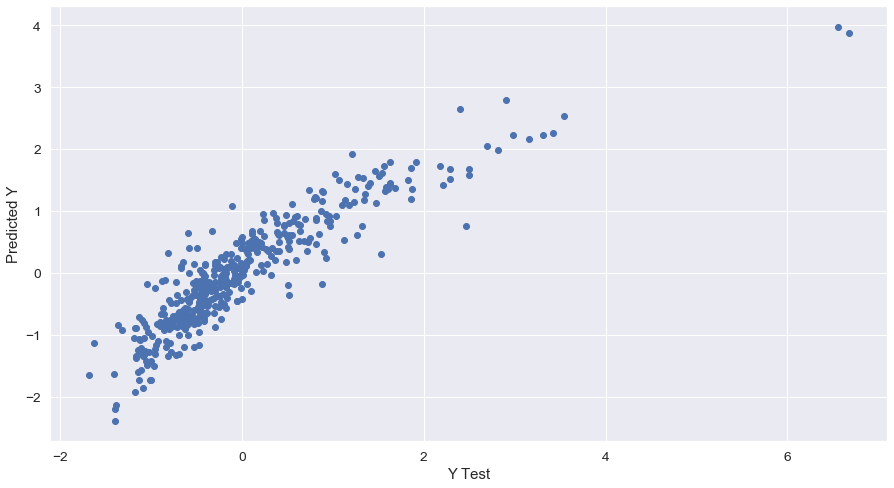

In [259]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

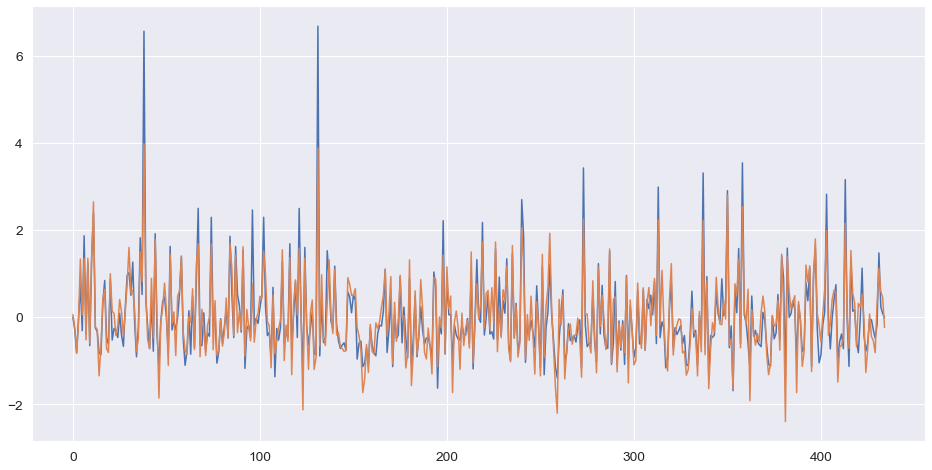

In [260]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [262]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.01, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=3000, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [263]:
model_lgb.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.01, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=3000, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [264]:
a = pd.read_csv(r'C:\Users\Admin\Project ML\test.csv')

In [265]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.25022601602312144
MSE: 0.1367910195075543
RMSE: 0.36985269974349827


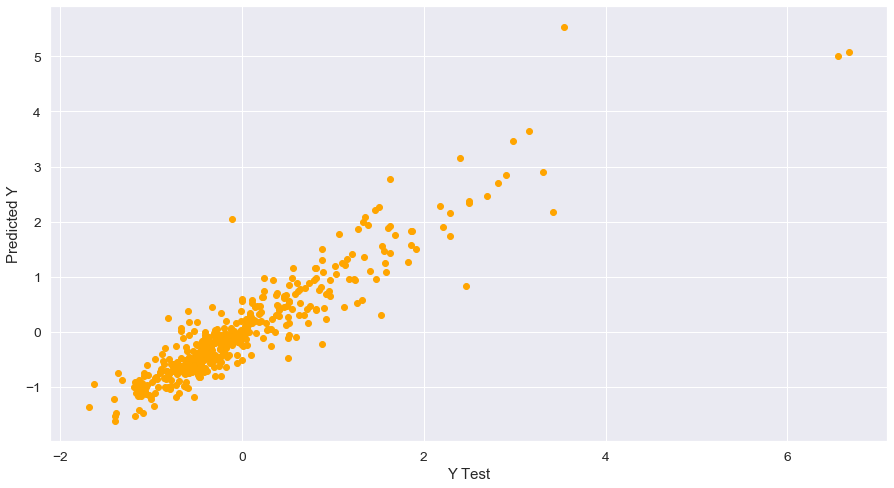

In [266]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [267]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])
test = sc_X.fit_transform(test)
test.shape

(1459, 9)

In [268]:
import lightgbm as lgb

In [269]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)
test_prediction_lgbm
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])
test_prediction_lgbm.head()

,SalePrice
0,121874.757059
1,158869.542376
2,171448.873740
3,177530.522695
4,215506.841354


In [272]:
result = pd.concat([a,test_prediction_lgbm], axis=1)
result.head()

,Id,SalePrice
0,1461,121874.757059
1,1462,158869.542376
2,1463,171448.873740
3,1464,177530.522695
4,1465,215506.841354


In [273]:
result.to_csv('submission.csv',index=False)